In [309]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [310]:
os.chdir("E:\\Project_prac")
data=pd.read_csv("AB_NYC_2019.csv")


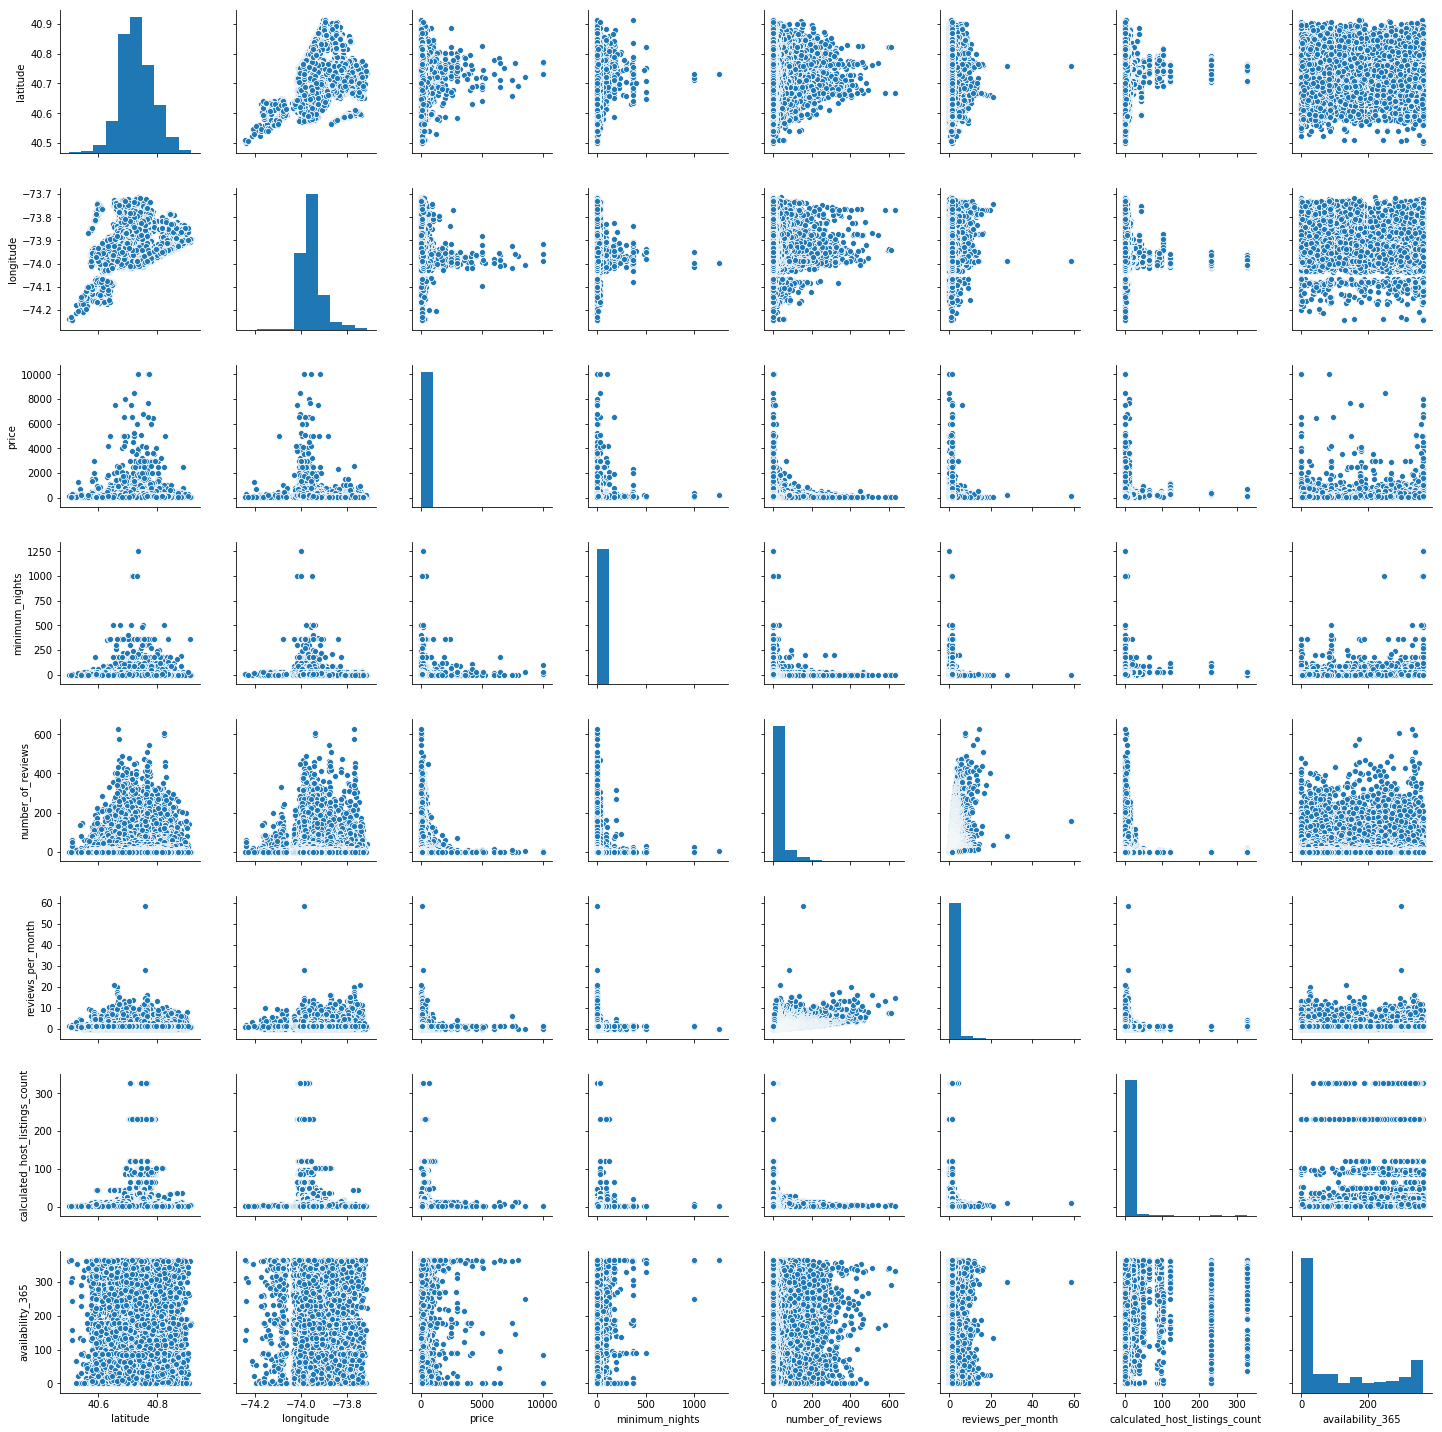

In [427]:
sns.pairplot(data)

In [312]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [313]:
top_10_host_brooklyn=data[data['neighbourhood_group']=='Brooklyn']['host_name'].value_counts().head(10)
top_10_host_manhattan=data[data['neighbourhood_group']=='Manhattan']['host_name'].value_counts().head(10)
top_10_host_queens=data[data['neighbourhood_group']=='Queens']['host_name'].value_counts().head(10)
top_10_host_bronx=data[data['neighbourhood_group']=='Bronx']['host_name'].value_counts().head(10)
top_10_host_Staten_Island=data[data['neighbourhood_group']=='Staten Island']['host_name'].value_counts().head(10)


Text(0.5, 1.0, 'Top 10 Host of Brooklyn')

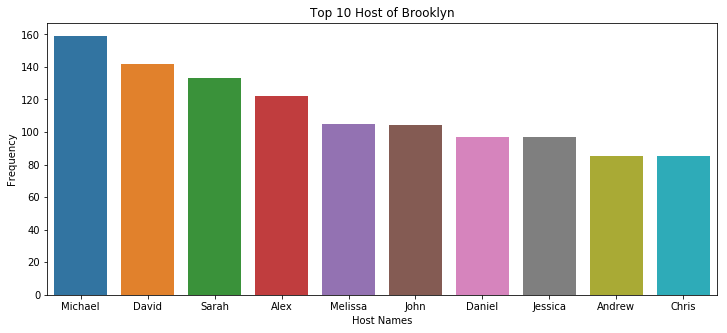

In [315]:
plt.figure(figsize=(12,5))
sns.barplot(top_10_host_brooklyn.index,top_10_host_brooklyn.values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Top 10 Host of Brooklyn')

Text(0.5, 1.0, 'Top 10 Host of Manhattan')

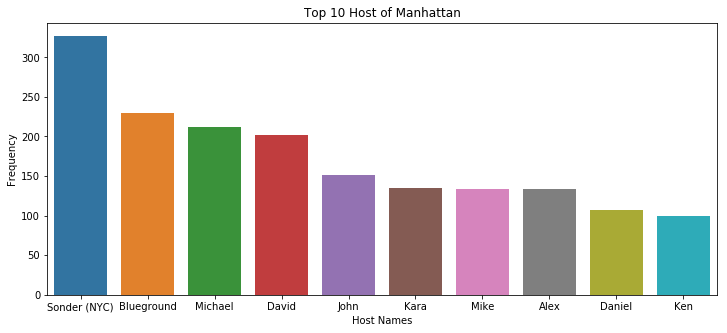

In [316]:
plt.figure(figsize=(12,5))
sns.barplot(top_10_host_manhattan.index,top_10_host_manhattan.values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Top 10 Host of Manhattan')

Text(0.5, 1.0, 'Top 10 Host of Queens')

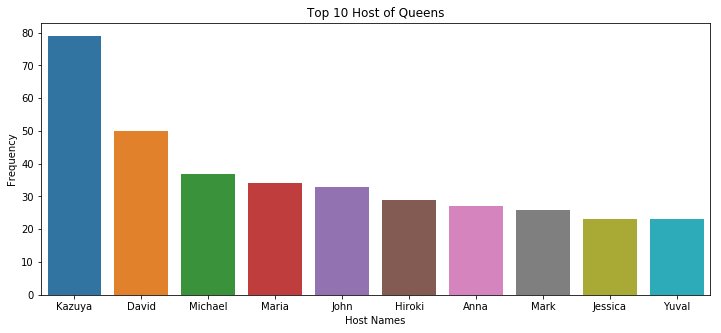

In [317]:
plt.figure(figsize=(12,5))
sns.barplot(top_10_host_queens.index,top_10_host_queens.values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Top 10 Host of Queens')

Text(0.5, 1.0, 'Top 10 Host of State Island')

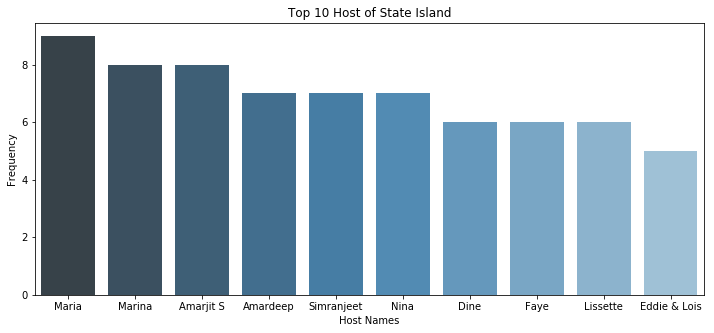

In [318]:
plt.figure(figsize=(12,5))
sns.barplot(top_10_host_Staten_Island.index,top_10_host_Staten_Island.values,palette='Blues_d')
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Top 10 Host of State Island')

Text(0.5, 1.0, 'Top 10 Host of Bronx')

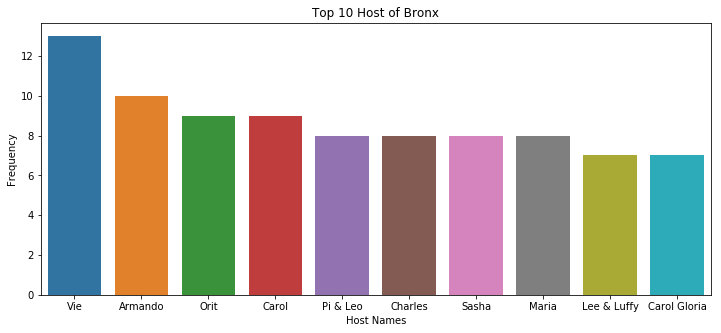

In [319]:
plt.figure(figsize=(12,5))
sns.barplot(top_10_host_bronx.index,top_10_host_bronx.values)
plt.xlabel('Host Names')
plt.ylabel('Frequency')
plt.title('Top 10 Host of Bronx')

In [320]:
data_brooklyn=data[data['neighbourhood_group']=='Brooklyn']
data_manhattan=data[data['neighbourhood_group']=='Manhattan']
data_bronx=data[data['neighbourhood_group']=='Bronx']
data_queens=data[data['neighbourhood_group']=='Queens']
data_state=data[data['neighbourhood_group']=='Staten Island']

In [321]:
data_brooklyn['neighbourhood'].unique()

array(['Kensington', 'Clinton Hill', 'Bedford-Stuyvesant', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Greenpoint', 'Bushwick', 'Flatbush',
       'Prospect-Lefferts Gardens', 'Prospect Heights',
       'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands',
       'Cobble Hill', 'Boerum Hill', 'DUMBO', 'East Flatbush',
       'Gravesend', 'East New York', 'Sheepshead Bay', 'Fort Hamilton',
       'Bensonhurst', 'Sunset Park', 'Brighton Beach', 'Cypress Hills',
       'Bay Ridge', 'Columbia St', 'Vinegar Hill', 'Canarsie',
       'Borough Park', 'Downtown Brooklyn', 'Midwood', 'Red Hook',
       'Dyker Heights', 'Sea Gate', 'Navy Yard', 'Brownsville',
       'Manhattan Beach', 'Bergen Beach', 'Coney Island', 'Bath Beach',
       'Mill Basin'], dtype=object)

Text(0.5, 1.0, "Top 10 Host's Frequency of Brooklyn")

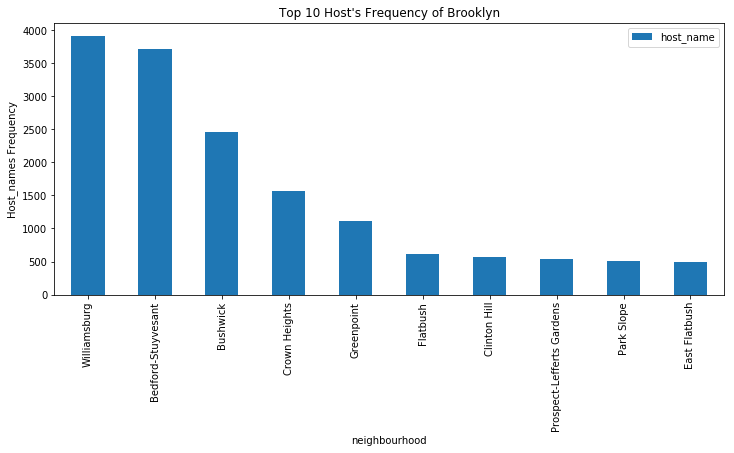

In [322]:
data_brooklyn.groupby('neighbourhood')[['host_name']].count().sort_values('host_name',ascending=False).head(10).plot.bar(figsize=(12,5))
plt.ylabel('Host_names Frequency')
plt.title("Top 10 Host's Frequency of Brooklyn")

Text(0.5, 1.0, "Top 10 Host's Frequency of Manhattan")

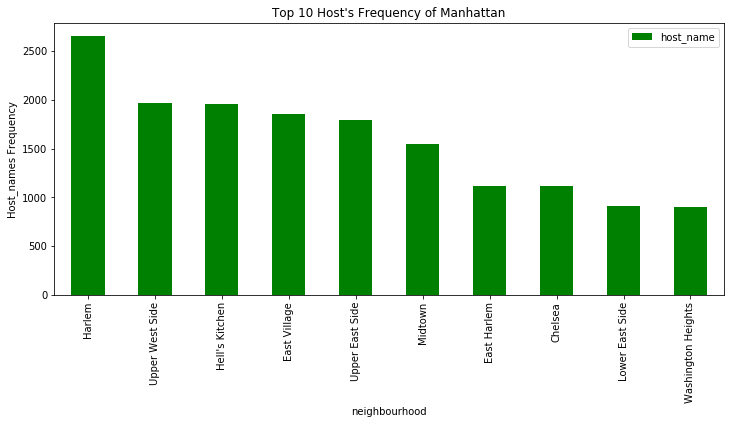

In [323]:
data_manhattan.groupby('neighbourhood')[['host_name']].count().sort_values('host_name',ascending=False).head(10).plot.bar(figsize=(12,5),color='green')
plt.ylabel('Host_names Frequency')
plt.title("Top 10 Host's Frequency of Manhattan")

Text(0.5, 1.0, "Top 10 Host's Frequency of Queens")

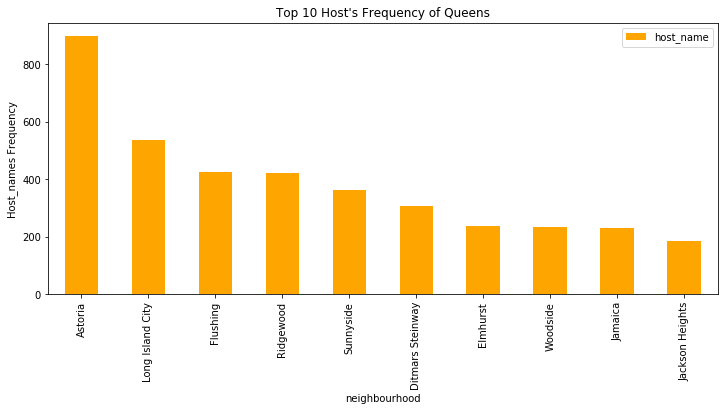

In [324]:
data_queens.groupby('neighbourhood')[['host_name']].count().sort_values('host_name',ascending=False).head(10).plot.bar(figsize=(12,5),color='Orange')
plt.ylabel('Host_names Frequency')
plt.title("Top 10 Host's Frequency of Queens")

Text(0.5, 1.0, "Top 10 Host's Frequency of State's Island")

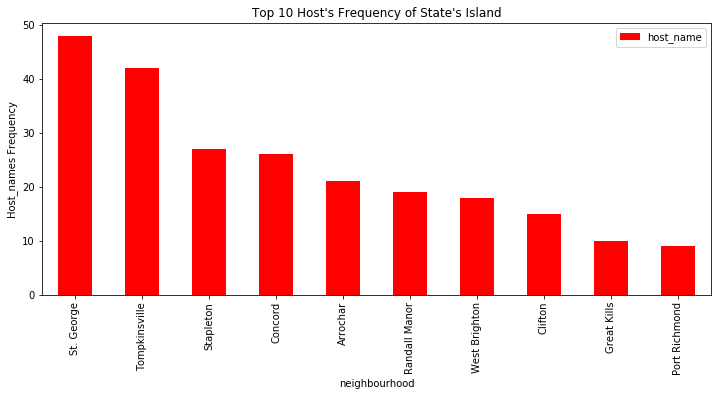

In [325]:
data_state.groupby('neighbourhood')[['host_name']].count().sort_values('host_name',ascending=False).head(10).plot.bar(figsize=(12,5),color='red')
plt.ylabel('Host_names Frequency')
plt.title("Top 10 Host's Frequency of State's Island")

Text(0.5, 1.0, "Top 10 Host's Frequency of Bronx")

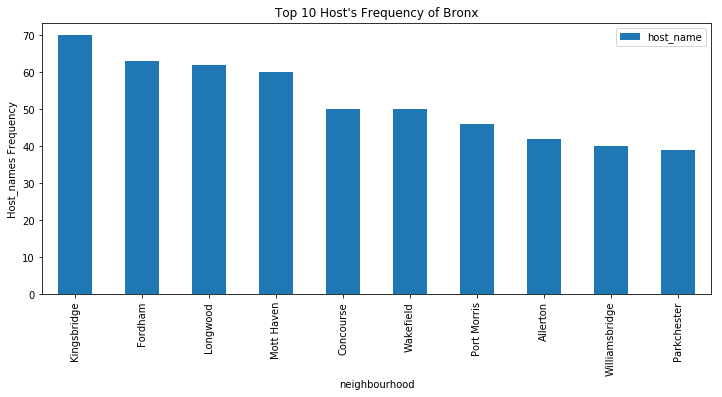

In [326]:
data_bronx.groupby('neighbourhood')[['host_name']].count().sort_values('host_name',ascending=False).head(10).plot.bar(figsize=(12,5))
plt.ylabel('Host_names Frequency')
plt.title("Top 10 Host's Frequency of Bronx")

In [327]:
data_brooklyn['neighbourhood'].nunique()

47

Text(0.5, 1.0, "Top 50 Host's Names")

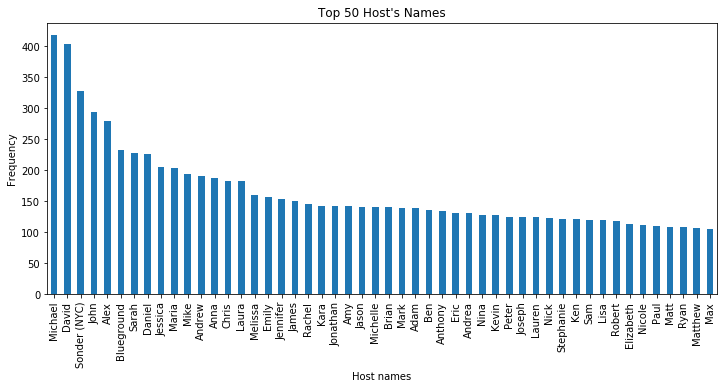

In [328]:
plt.figure(figsize=(12,5))
data['host_name'].value_counts().head(50).plot.bar()
plt.xlabel('Host names')
plt.ylabel('Frequency')
plt.title("Top 50 Host's Names")

Text(0.5, 1.0, 'As per the Calculated Host Listings Top 20 Host names of Brooklyn')

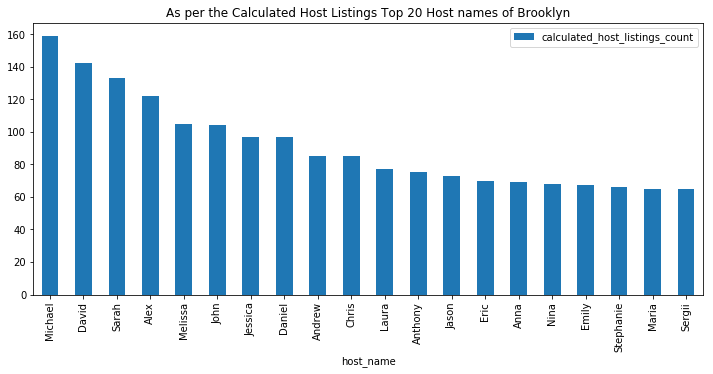

In [329]:

data_brooklyn.groupby('host_name')[['calculated_host_listings_count']].count().sort_values(by='calculated_host_listings_count',ascending=False).head(20).plot.bar(figsize=(12,5))
plt.title('As per the Calculated Host Listings Top 20 Host names of Brooklyn')

In [330]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

In [331]:
text = " ".join(review for review in data['host_name'].dropna())

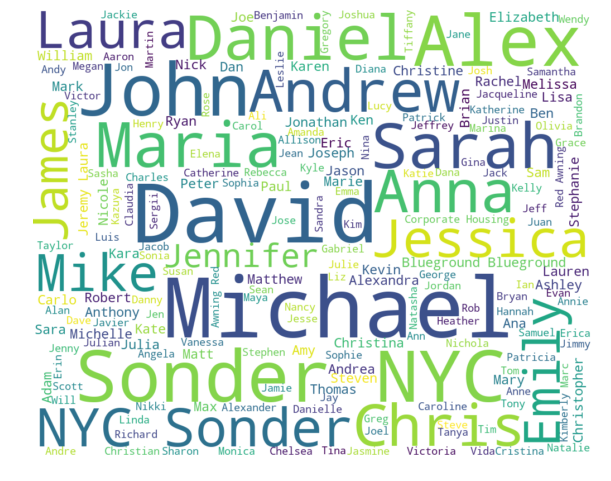

In [332]:
word = WordCloud(width=1000,height=800,margin=0,max_font_size=150,background_color='white').generate(text)

plt.figure(figsize=[10,10])
plt.imshow(word,interpolation='bilinear')
plt.axis('off')
plt.show()

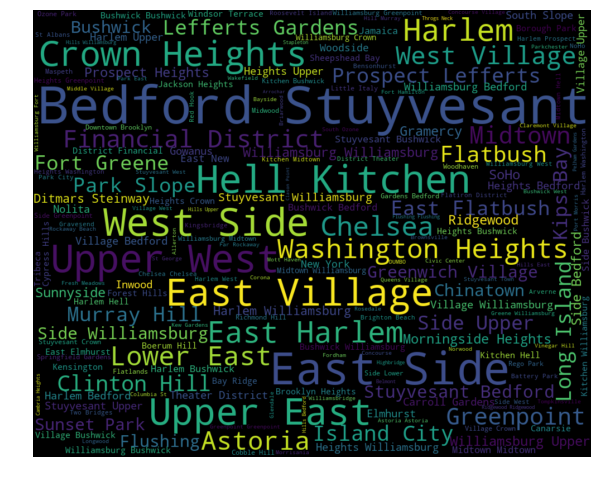

In [333]:
text1 = " ".join(review for review in data['neighbourhood'].dropna())
word = WordCloud(width=1000,height=800,margin=0,max_font_size=150).generate(text1)

plt.figure(figsize=[10,10])
plt.imshow(word,interpolation='bilinear')
plt.axis('off')
plt.show()

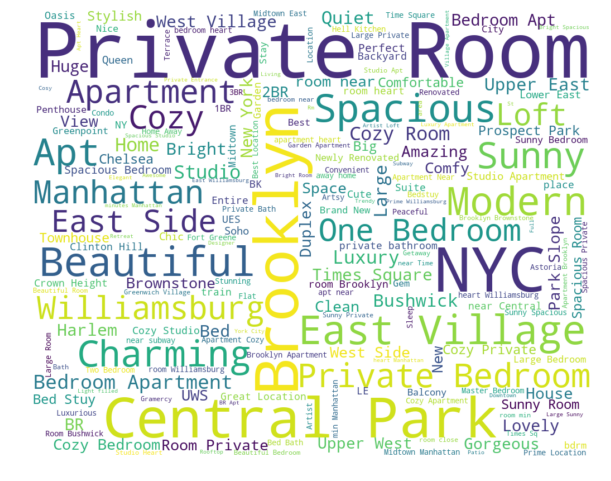

In [334]:
text2 = " ".join(review for review in data['name'].dropna())
word = WordCloud(width=1000,height=800,margin=0,max_font_size=150,background_color='white').generate(text2)

plt.figure(figsize=[10,10])
plt.imshow(word,interpolation='bilinear')
plt.axis('off')
plt.show()

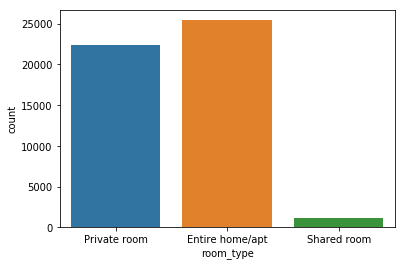

In [335]:
sns.countplot(data['room_type'])

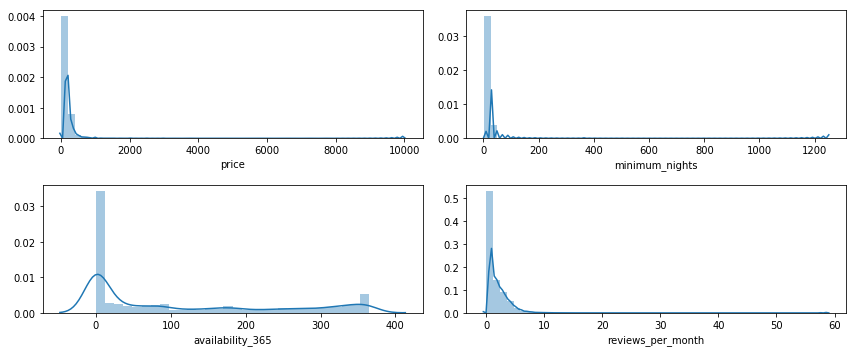

In [336]:
fig,ax = plt.subplots(2,2,figsize=(12,5))
sns.distplot(data['price'],ax=ax[0,0])
sns.distplot(data['minimum_nights'],ax=ax[0,1])
sns.distplot(data['availability_365'],ax=ax[1,0])
sns.distplot(data['reviews_per_month'].dropna(),ax=ax[1,1])
plt.tight_layout()

In [337]:
data = data.drop(columns=['id','name','host_id','host_name','last_review'])
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [338]:
# 10052 missing values in the Reviews per month
data.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [339]:
#imputing the missing values
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())
data.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

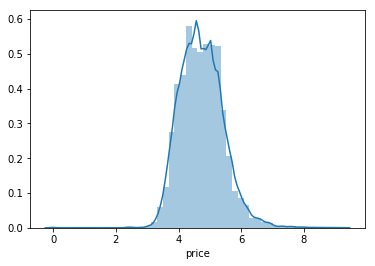

In [340]:
sns.distplot(np.log(data['price']+1))

In [341]:
#IQR method for Outliers Detection
q1 = data['price'].quantile(0.25)
q3 =data['price'].quantile(0.75)
print(q1,q3)
iqr = q3-q1
print('IQR value',iqr)

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

print("Upper value",upper_limit)
print("Lower value",lower_limit)

69.0 175.0
IQR value 106.0
Upper value 334.0
Lower value -90.0


In [342]:
#Zscore method
print('Z score upper value',data['price'].mean()+3*data['price'].std())
print('Z score lower value',data['price'].mean()-3*data['price'].std())

Z score upper value 873.1831964283906
Z score lower value -567.7418220547329


In [343]:
data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [344]:
#price is Zero
data[data['price']==0].shape

(11, 11)

In [345]:
#price is missing 999
data[data['price']==999].shape

(17, 11)

In [346]:
##price is missing 9999
data[data['price']==9999].shape

(3, 11)

In [347]:
##price is missing 99
data[data['price']==99].shape

(742, 11)

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


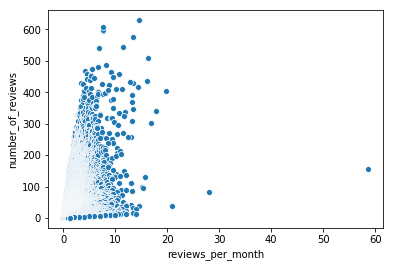

In [349]:
sns.scatterplot(data['reviews_per_month'],data['number_of_reviews'])

In [350]:
# Taking the Average reviews per month by group by Neighbourhood group
data.groupby(['neighbourhood_group']).agg({'reviews_per_month':'mean'})

,reviews_per_month
neighbourhood_group,
Bronx,1.746272
Brooklyn,1.299585
Manhattan,1.295601
Queens,1.831735
Staten Island,1.793593


Text(0.5, 1.0, 'As per the Avg Review Top 20 Neighbourhood ')

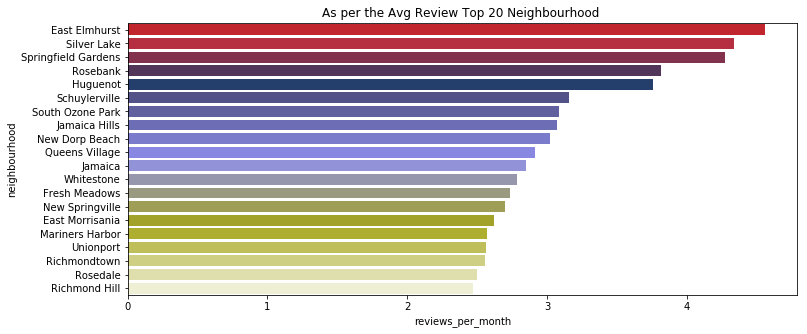

In [351]:
avg_reviews_neigh_20=data.groupby(['neighbourhood']).agg({'reviews_per_month':'mean'}).sort_values(by='reviews_per_month',ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(avg_reviews_neigh_20['reviews_per_month'],avg_reviews_neigh_20.index,palette='gist_stern')
plt.title('As per the Avg Review Top 20 Neighbourhood ')

Text(0.5, 1.0, 'As per Avg price Top 20 Neighbourhoood')

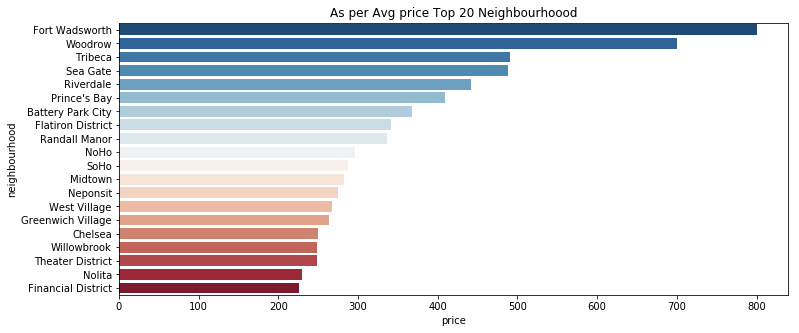

In [352]:
avg_price_neigh_20=data.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(avg_price_neigh_20['price'],avg_price_neigh_20.index,palette='RdBu_r')
plt.title('As per Avg price Top 20 Neighbourhoood')

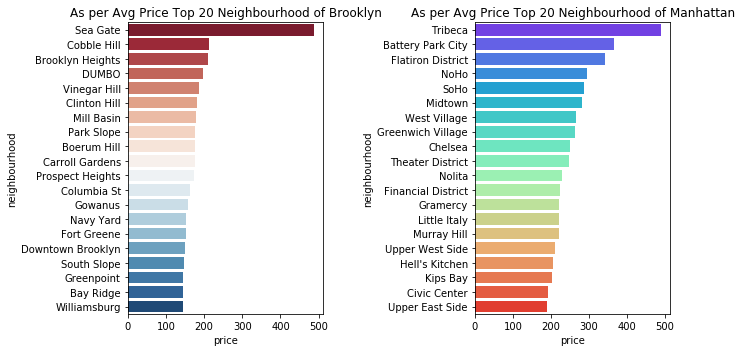

In [353]:
avg_price_bly_20=data_brooklyn.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(20)
avg_price_man_20=data_manhattan.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(20)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(avg_price_bly_20['price'],avg_price_bly_20.index,palette='RdBu',ax=ax[0])
sns.barplot(avg_price_man_20['price'],avg_price_man_20.index,palette='rainbow',ax=ax[1])

ax[0].set_title('As per Avg Price Top 20 Neighbourhood of Brooklyn')
ax[1].set_title('As per Avg Price Top 20 Neighbourhood of Manhattan')
plt.tight_layout()

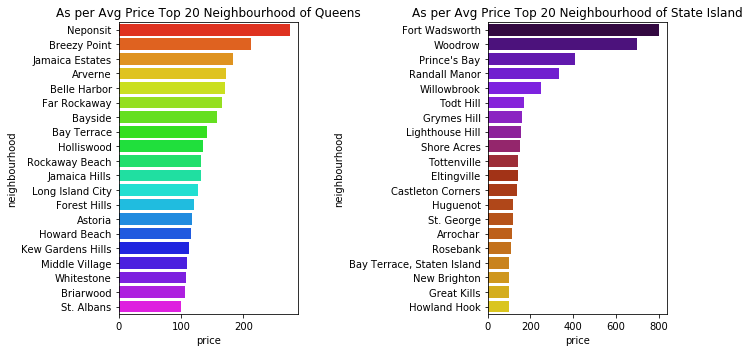

In [354]:
avg_price_que_20=data_queens.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(20)
avg_price_sat_20=data_state.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(20)

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(avg_price_que_20['price'],avg_price_que_20.index,palette='gist_rainbow',ax=ax[0])
sns.barplot(avg_price_sat_20['price'],avg_price_sat_20.index,palette='gnuplot',ax=ax[1])

ax[0].set_title('As per Avg Price Top 20 Neighbourhood of Queens')
ax[1].set_title('As per Avg Price Top 20 Neighbourhood of State Island')
plt.tight_layout()

Text(0.5, 1.0, 'As per the Avg Price Top 20 Neighbourhood of Bronx ')

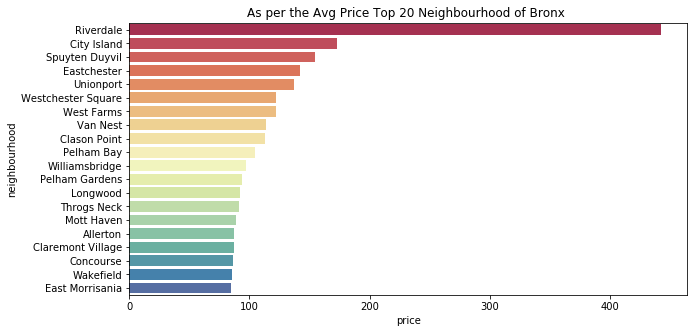

In [355]:
avg_price_bro_20=data_bronx.groupby(['neighbourhood']).agg({'price':'mean'}).sort_values(by='price',ascending=False).head(20)
plt.figure(figsize=(10,5))

sns.barplot(avg_price_bro_20['price'],avg_price_bro_20.index,palette='Spectral')
plt.title('As per the Avg Price Top 20 Neighbourhood of Bronx ')


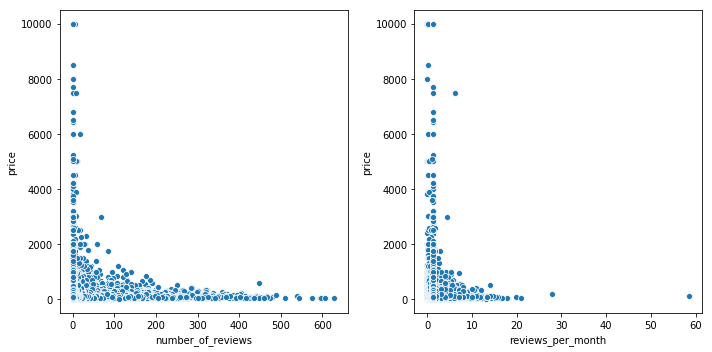

In [356]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data['number_of_reviews'],data['price'],ax=ax[0])
sns.scatterplot(data['reviews_per_month'],data['price'],ax=ax[1])
plt.tight_layout()

In [357]:
data.groupby(['room_type']).agg({'price':'mean'})

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [358]:
# Replacing the 0,99,999,9999 values as missing 
data['price']=data['price'].astype('str')
data['price']=data['price'].replace('0',np.nan)
data['price']=data['price'].replace('99',np.nan)
data['price']=data['price'].replace('999',np.nan)
data['price']=data['price'].replace('9999',np.nan)
data['price'].isna().sum()

773

In [359]:
#checking the percentage of the NAN
#1.5 so we will dropn the nan values
print('Percentage of Missing values',data['price'].isna().sum()/data.shape[0]*100)
data=data.dropna()

Percentage of Missing values 1.580938746293077


In [360]:
data['price']=data['price'].astype(float)
print("Mean Price",data['price'].mean())
print("Median Price",data['price'].median())

Mean Price 152.67112755080836
Median Price 110.0


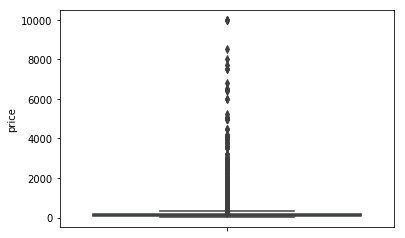

In [361]:
sns.boxplot(y=data['price'])

In [362]:
#As per the IQR method we are removing the Outliers
data_price_upper_limit=data[data['price']>334]
data_price_wi_out_upper_values = data[data['price']<=334]
print(data_price_upper_limit.shape)
print(data_price_wi_out_upper_values.shape)

(2952, 11)
(45170, 11)


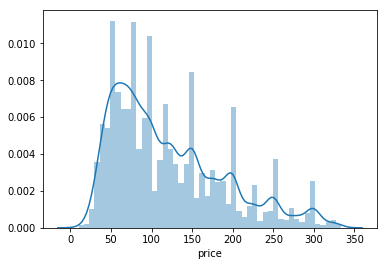

In [363]:
sns.distplot(data_price_wi_out_upper_values['price'])

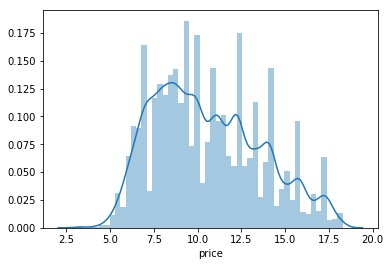

In [364]:
sns.distplot(np.sqrt(data_price_wi_out_upper_values['price']))

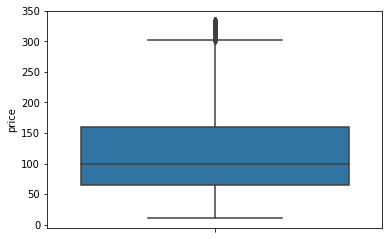

In [365]:
sns.boxplot(y=data_price_wi_out_upper_values['price'])

In [366]:
data_price_wi_out_upper_values['minimum_nights'].quantile(0.75)-data_price_wi_out_upper_values['minimum_nights'].quantile(0.25)

4.0

In [367]:
#zscore method for minimum nights
data_price_wi_out_upper_values['minimum_nights'].mean()+3*data_price_wi_out_upper_values['minimum_nights'].std()

64.94273113461887

In [368]:
#decided to go with the IQR method where the upper limit for minimum nights 11
data_price_wi_out_upper_values=data_price_wi_out_upper_values[data_price_wi_out_upper_values['minimum_nights']<=11]

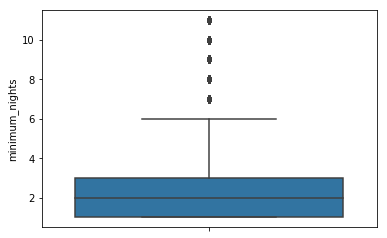

In [369]:
sns.boxplot(y=data_price_wi_out_upper_values['minimum_nights'])

In [370]:
data_price_wi_out_upper_values[['number_of_reviews','reviews_per_month']].corr()

,number_of_reviews,reviews_per_month
number_of_reviews,1.00000,0.53601
reviews_per_month,0.53601,1.00000


In [371]:
# IQRmethod for the calculated host listing with max value as 3.5
data_price_wi_out_upper_values=data_price_wi_out_upper_values[data_price_wi_out_upper_values['calculated_host_listings_count']<=3.5]

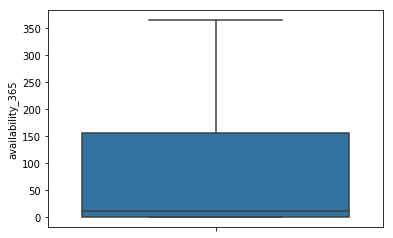

In [372]:
sns.boxplot(y=data_price_wi_out_upper_values['availability_365'])

In [373]:
data_price_wi_out_upper_values['reviews_per_month'].quantile(0.75)+1.5*1.47

3.935

In [374]:
data_price_wi_out_upper_values=data_price_wi_out_upper_values[data_price_wi_out_upper_values['reviews_per_month']<=3.935]

In [375]:
print(data_price_wi_out_upper_values.describe())


           latitude     longitude         price  minimum_nights  \
count  32863.000000  32863.000000  32863.000000    32863.000000   
mean      40.727960    -73.951770    121.935885        2.852448   
std        0.055769      0.043966     67.332549        1.907143   
min       40.499790    -74.244420     10.000000        1.000000   
25%       40.688790    -73.980990     70.000000        1.000000   
50%       40.719980    -73.954230    100.000000        2.000000   
75%       40.763540    -73.936205    160.000000        4.000000   
max       40.913060    -73.712990    334.000000       11.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       32863.000000       32863.000000                    32863.000000   
mean           20.678483           1.086635                        1.283358   
std            37.794055           0.952995                        0.574374   
min             0.000000           0.010000                        1.000000   
2

In [376]:
data_price_wi_out_upper_values=data_price_wi_out_upper_values[data_price_wi_out_upper_values['number_of_reviews']<=53.5]

In [377]:
#data_pre data ready for the Analysis and model building
data_pre = data_price_wi_out_upper_values
data_pre.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [378]:
data_pre = data_pre.drop(columns=['neighbourhood'])
data_pre = pd.get_dummies(data=data_pre,columns=['neighbourhood_group','room_type'],drop_first=True)

In [379]:
# Data ready for the model without the outliers
data_pre.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
1,40.75362,-73.98377,225.0,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150.0,3,0,1.373221,1,365,0,1,0,0,1,0
4,40.79851,-73.94399,80.0,10,9,0.100000,1,0,0,1,0,0,0,0
10,40.80316,-73.96545,135.0,5,53,0.430000,1,6,0,1,0,0,0,0
19,40.79685,-73.94872,190.0,7,0,1.373221,2,249,0,1,0,0,0,0


### Building the Model 

#### Removing the longitude,latitude,calculated_host_listings_count because of High Multicollinearity

In [424]:
#Building the raw model only by removinng the outliers in all the variables.
X = data_pre.drop(columns=['price','longitude','latitude','calculated_host_listings_count'])
y = data_pre['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1866.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:39:38   Log-Likelihood:            -1.2364e+05
No. Observations:               23155   AIC:                         2.473e+05
Df Residuals:                   23144   BIC:                         2.474e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               127.1041      2.392     53.143      0.000     122.416     131.792
minimum_nights                       -1.2564      0.172     -7.290      0.000      -1.594      -0.919
number_of_reviews                    -0.3151      0.029    -10.920      0.000      -0.372      -0.259
reviews_per_month                     2.6581      0.429      6.198      0.000       1.817       3.499
availability_365                      0.0750      0.003     24.228      0.000       0.069       0.081
neighbourhood_group_Brooklyn         23.4708      2.276     10.311      0.000      19.009      27.933
neighbourhood_group_Manhattan        53.1441      2.285     23.255      0.000      48.665      57.623
neighbourhood_group_Queens           12.4968      2.422      5.160      0.000       7.750      17.243
neighbourhood_group_Staten Island     3.9116      4.558      0.858      0.391      -5.023      12.846
room_type_Private room              -80.1246      0.684   -117.063      0.000     -81.466     -78.783
room_type_Shared room               -94.9436      2.441    -38.902      0.000     -99.727     -90.160
==============================================================================
Omnibus:                     3092.726   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5109.257
Skew:                           0.915   Prob(JB):                         0.00
Kurtosis:                       4.395   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
minimum_nights,3.147812
number_of_reviews,1.782534
reviews_per_month,2.477533
availability_365,1.536308
neighbourhood_group_Brooklyn,3.317366
neighbourhood_group_Manhattan,2.916845
neighbourhood_group_Queens,1.633867
neighbourhood_group_Staten Island,1.046392
room_type_Private room,1.976074
room_type_Shared room,1.046626


In [425]:
#Building the Sklearn Decision Tree Regressor
model_1 = DecisionTreeRegressor(random_state=1)
model_1.fit(X_train,y_train)
print(model_1.score(X_train,y_train))
print(model_1.score(X_test,y_test))

0.8430689909877066
0.03772108861124168


In [383]:
data_pre.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

### Normalizing the Data

In [384]:
norm = data_pre.drop(['latitude','longitude'],axis=1)
df_nor = preprocessing.normalize(norm)
df_nor= pd.DataFrame(df_nor)
df_nor.columns = ['price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room']

In [385]:
df_nor.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.532284,0.002366,0.106457,0.000899,0.004731,0.839825,0.0,0.002366,0.0,0.0,0.000000,0.0
1,0.380095,0.007602,0.000000,0.003480,0.002534,0.924899,0.0,0.002534,0.0,0.0,0.002534,0.0
2,0.986002,0.123250,0.110925,0.001233,0.012325,0.000000,0.0,0.012325,0.0,0.0,0.000000,0.0
3,0.929440,0.034424,0.364891,0.002960,0.006885,0.041308,0.0,0.006885,0.0,0.0,0.000000,0.0
4,0.606448,0.022343,0.000000,0.004383,0.006384,0.794765,0.0,0.003192,0.0,0.0,0.000000,0.0


Removing the below features because of Multicollinearity
calculated_host_listings_count,neighbourhood_group_Brooklyn,room_type_Private room
neighbourhood_group_Staten Island,neighbourhood_group_Queens

In [386]:
X = df_nor.drop(columns=['price','calculated_host_listings_count','neighbourhood_group_Brooklyn','room_type_Private room'
                        ,'neighbourhood_group_Staten Island','neighbourhood_group_Queens'])
y=df_nor['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 3.135e+04
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:01:47   Log-Likelihood:                 23965.
No. Observations:               23155   AIC:                        -4.792e+04
Df Residuals:                   23148   BIC:                        -4.786e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.0210      0.001    888.718      0.000       1.019       1.023
minimum_nights                   -0.1143      0.021     -5.574      0.000      -0.154      -0.074
number_of_reviews                -0.1452      0.006    -24.899      0.000      -0.157      -0.134
reviews_per_month                 1.1183      0.067     16.619      0.000       0.986       1.250
availability_365                 -0.6483      0.002   -403.535      0.000      -0.651      -0.645
neighbourhood_group_Manhattan     0.2627      0.116      2.268      0.023       0.036       0.490
room_type_Shared room            -1.7166      0.260     -6.606      0.000      -2.226      -1.207
==============================================================================
Omnibus:                      489.189   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.947
Skew:                          -0.162   Prob(JB):                    5.63e-194
Kurtosis:                       3.904   Cond. No.                         483.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8904286286926149
0.8875281779827736


In [388]:
model.coef_

array([-0.11428354, -0.14521185,  1.11827669, -0.64832404,  0.26268147,
       -1.71664647])

In [389]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
minimum_nights,1.576240
number_of_reviews,1.541388
reviews_per_month,1.853365
availability_365,1.180910
neighbourhood_group_Manhattan,1.301447
room_type_Shared room,1.044279


In [426]:
X = df_nor.drop(columns=['price','neighbourhood_group_Manhattan','neighbourhood_group_Queens',
                         'neighbourhood_group_Staten Island','neighbourhood_group_Brooklyn','calculated_host_listings_count'])
y=df_nor['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 3.187e+04
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:42:40   Log-Likelihood:                 24134.
No. Observations:               23155   AIC:                        -4.825e+04
Df Residuals:                   23148   BIC:                        -4.820e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.0243      0.001    966.124      0.000       1.022       1.026
minimum_nights             0.0658      0.022      2.929      0.003       0.022       0.110
number_of_reviews         -0.1392      0.006    -24.018      0.000      -0.151      -0.128
reviews_per_month          1.5261      0.070     21.713      0.000       1.388       1.664
availability_365          -0.6519      0.002   -418.027      0.000      -0.655      -0.649
room_type_Private room    -1.6770      0.090    -18.610      0.000      -1.854      -1.500
room_type_Shared room     -2.5469      0.261     -9.757      0.000      -3.058      -2.035
==============================================================================
Omnibus:                      516.906   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.451
Skew:                          -0.176   Prob(JB):                    2.72e-204
Kurtosis:                       3.921   Cond. No.                         490.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
minimum_nights,2.014260
number_of_reviews,1.535869
reviews_per_month,2.083486
availability_365,1.182094
room_type_Private room,2.288341
room_type_Shared room,1.067775


### SVR model

In [392]:
ml = SVR(kernel='linear')
ml.fit(X_train,y_train)
print(ml.score(X_train,y_train))
print(ml.score(X_test,y_test))

0.8469585855764378
0.8434785872584336


### Ridge Regression

In [393]:
clf  = RidgeCV(alphas=[10,100,1000,10000],cv=10).fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


0.8894406858316993
0.886506887456287


In [394]:
clf.alpha_,clf.alphas,clf.cv,clf.coef_

(10,
 array([   10,   100,  1000, 10000]),
 10,
 array([-0.03088681, -0.11514988,  0.15066338, -0.64728695, -0.10022005,
        -0.01368532]))

### Standardize Scaling and Model Building

In [414]:
df_scale=data_pre[['latitude', 'longitude','price','minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
df_scale.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,40.75362,-73.98377,225.0,1,45,0.380000,2,355
2,40.80902,-73.94190,150.0,3,0,1.373221,1,365
4,40.79851,-73.94399,80.0,10,9,0.100000,1,0
10,40.80316,-73.96545,135.0,5,53,0.430000,1,6
19,40.79685,-73.94872,190.0,7,0,1.373221,2,249


In [416]:
scaler= StandardScaler()
df_scale=scaler.fit_transform(df_scale)


In [417]:
df_scale = pd.DataFrame(df_scale)
df_scale.columns=['latitude', 'longitude','price','minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
df_scale.head()
print(df_scale.shape)

(28944, 8)


In [418]:
X = df_scale.drop(columns=['price'],axis=1)
y = df_scale['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     428.9
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:25:06   Log-Likelihood:                -31470.
No. Observations:               23155   AIC:                         6.296e+04
Df Residuals:                   23147   BIC:                         6.302e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0015      0.006      0.243      0.808      -0.011       0.014
latitude                           0.0892      0.006     14.308      0.000       0.077       0.101
longitude                         -0.3107      0.006    -48.546      0.000      -0.323      -0.298
minimum_nights                     0.0278      0.006      4.438      0.000       0.016       0.040
number_of_reviews                 -0.0112      0.007     -1.689      0.091      -0.024       0.002
reviews_per_month                  0.0505      0.007      7.582      0.000       0.037       0.064
calculated_host_listings_count    -0.1100      0.006    -17.102      0.000      -0.123      -0.097
availability_365                   0.1145      0.007     17.344      0.000       0.102       0.127
==============================================================================
Omnibus:                     2301.614   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3042.217
Skew:                           0.867   Prob(JB):                         0.00
Kurtosis:                       3.380   Cond. No.                         1.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""